In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_dir = "/project/jnovembre/dpr/mmc_genomics/simulations/msprime/"

In [3]:
for file in os.listdir(data_dir):
    size = os.stat(data_dir + file).st_size
    print(file, '\t', size//int(1e6), 'M')

branch_lengths-5.npz 	 56 M
branch_lengths-4.npz 	 57 M
branch_lengths-12.npz 	 57 M
branch_lengths-10.npz 	 57 M
branch_lengths-9.npz 	 57 M
branch_lengths-14.npz 	 57 M
branch_lengths-8.npz 	 57 M
branch_lengths-15.npz 	 57 M
branch_lengths-11.npz 	 57 M
branch_lengths-1.npz 	 57 M
branch_lengths-19.npz 	 57 M
branch_lengths-18.npz 	 57 M
branch_lengths-13.npz 	 57 M
branch_lengths-7.npz 	 56 M
branch_lengths-6.npz 	 57 M
branch_lengths-17.npz 	 57 M
branch_lengths-2.npz 	 57 M
branch_lengths-3.npz 	 57 M
branch_lengths-16.npz 	 57 M
branch_lengths-0.npz 	 57 M


In [4]:
# Get positions of 4D sites from Chr2L
fourD_sites = pd.read_csv('../data/dmel-4Dsites.txt.gz', header=None,
                          names=['chr', 'pos'], sep='\t')
# Starting position of central window
start = int(1e6) + 1
positions = np.array(fourD_sites.pos[fourD_sites.chr == '2L'] - start)

In [5]:
# Simulations were done in 1 MB blocks
block_size = int(1e6)
n_blocks = 10
pos_list = [positions[np.logical_and(positions >= i*block_size, positions < (i+1)*block_size)] - i*block_size
           for i in range(n_blocks)]
print(pos_list)

[array([ 13961,  13970,  13973, ..., 998688, 998691, 998712]), array([   943,    952,    964, ..., 998229, 998238, 998241]), array([ 13506,  13509,  13542, ..., 989402, 989411, 989414]), array([    55,     58,     79, ..., 999294, 999297, 999300]), array([  4175,   4184,   4190, ..., 996475, 996481, 996484]), array([   316,    319,    322, ..., 999838, 999841, 999844]), array([ 12331,  12337,  12340, ..., 999993, 999996, 999999]), array([    14,     17,     20, ..., 999398, 999401, 999407]), array([ 10685,  10688,  10691, ..., 999973, 999979, 999997]), array([     0,      3,      9, ..., 999986, 999992, 999995])]


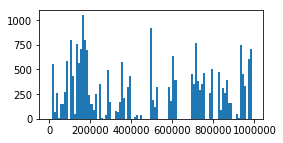

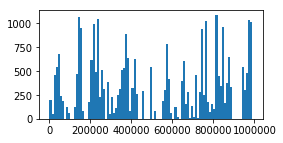

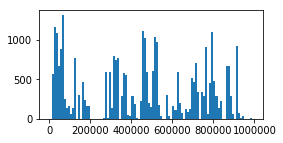

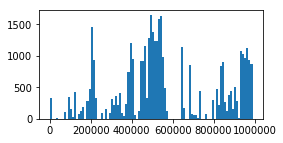

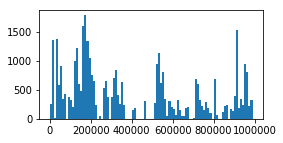

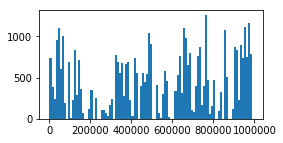

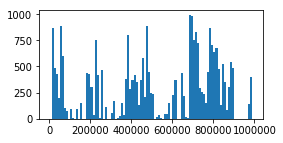

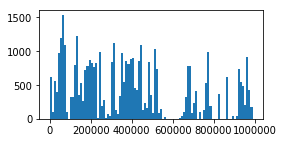

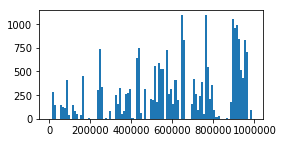

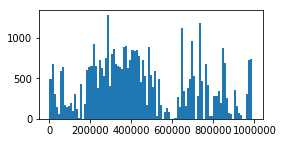

In [6]:
for i in range(n_blocks):
    plt.figure(figsize=(4,2))
    plt.hist(pos_list[i], bins=np.arange(0,block_size, block_size/100))
    plt.show()

In [7]:
max_distance = 1000
n_pairs = []
for pos in pos_list:
    fourd = np.zeros(block_size)
    fourd[pos] = 1
    n_pairs.append(np.correlate(fourd, fourd[:-max_distance]))

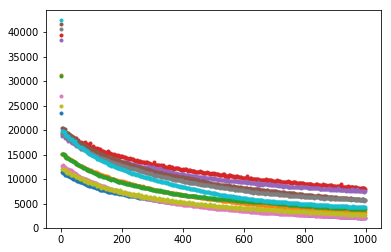

In [8]:
for elem in n_pairs:
    plt.plot(np.arange(0,max_distance,3), elem[::3], '.')

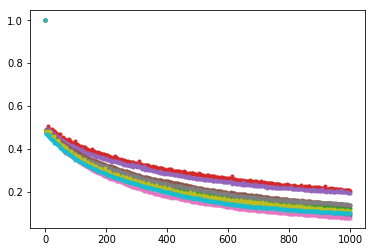

In [9]:
for elem in n_pairs:
    plt.plot(np.arange(0,max_distance,3), elem[::3]/elem[0], '.')

In [10]:
def fold_branch_lengths(bl):
    n = bl.shape[-1]
    folded = (bl[...,:n//2:] + bl[...,n-1:-(n//2+1):-1])
    if n % 2 == 0:
        folded[...,-1] /= 2
    return folded

In [11]:
n = 100

In [12]:
test_file = data_dir + "branch_lengths-0.npz"
with np.load(test_file) as data:
    branch_lengths = [fold_branch_lengths(data['arr_{}'.format(i)]) for i in range(n_blocks)]

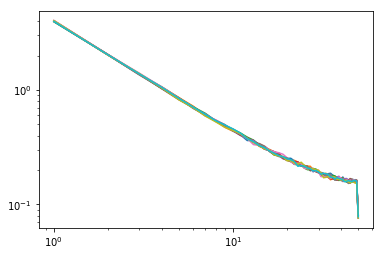

In [13]:
for elem in branch_lengths:
    plt.loglog(np.arange(1, n//2+1), np.mean(elem, axis=0))

In [18]:
def corr(a, b, max_distance):
    b_short = b[:-max_distance]
    AB = np.correlate(a, b_short)
    A  = np.correlate(a, np.ones_like(b_short))
    B  = np.correlate(np.ones_like(a), b_short)
    return AB - A*B

In [25]:
cutoff = 5
hilo_corr = []
for pos, bl in zip(pos_list, branch_lengths):
    obs = np.zeros(block_size)
    lo = np.zeros(block_size)
    hi = np.zeros(block_size)
    
    obs[pos] = 1
    lo[pos] = np.sum(bl[:, :cutoff], axis=-1)
    hi[pos] = np.sum(bl[:, cutoff:], axis=-1)
    
    n_comps
    hlc = np.correlate(lo, hi[:-max_distance]) / nps
    
    l = np.convolve()
    # hilo_corr.append(np.correlate(lo, hi[:-max_distance]) / nps)
    #hilo_corr.append(corr(lo, hi, max_distance))
    hilo_corr.append(hlc)

/home/dpr/miniconda3/envs/multiplemergers/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


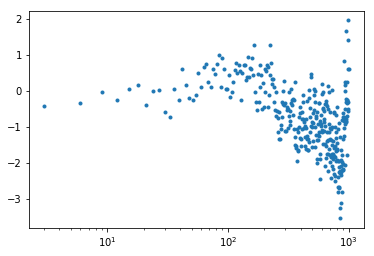

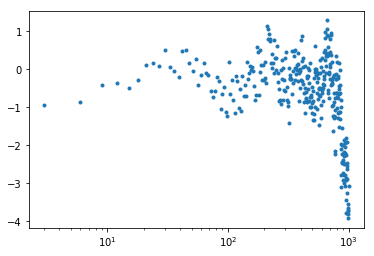

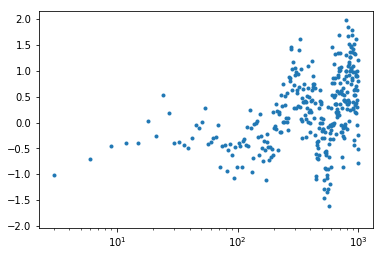

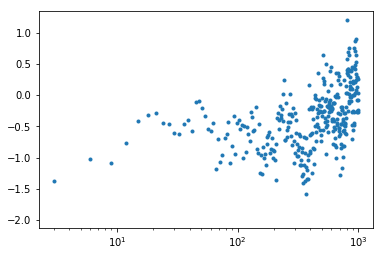

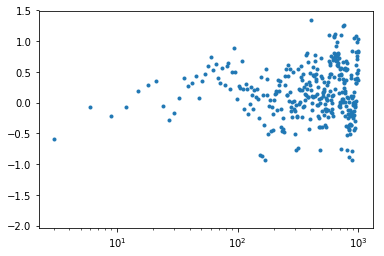

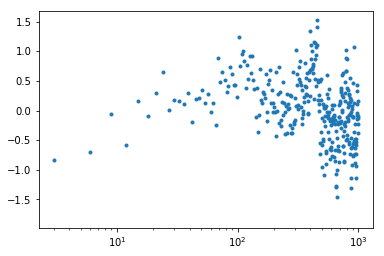

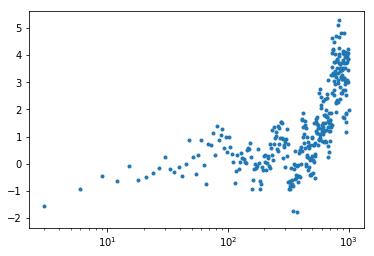

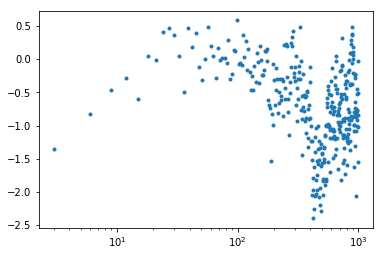

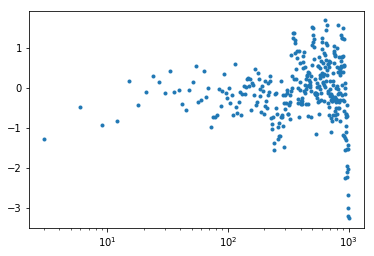

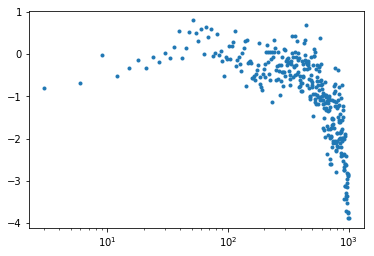

In [26]:
for elem in hilo_corr:
    plt.semilogx(np.arange(0,max_distance,3), elem[::3], '.')
    plt.show()

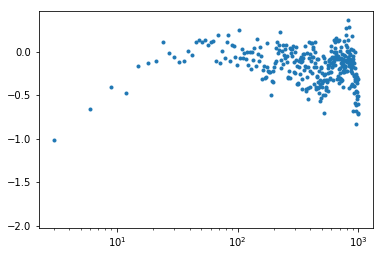

In [27]:
plt.semilogx(np.arange(0,max_distance,3), sum(hilo_corr)[::3]/n_blocks, '.')
plt.show()

In [106]:
n_reps = 20
cutoff = 5
hilo_corr = np.zeros((n_reps, max_distance+1))

for rep in range(n_reps):
    print(rep)
    fn = data_dir + "branch_lengths-{}.npz".format(rep)
    with np.load(fn) as data:
        branch_lengths = [fold_branch_lengths(data['arr_{}'.format(i)]) for i in range(n_blocks)]
        
    for pos, bl, nps in zip(pos_list, branch_lengths, n_pairs):
        lo = np.zeros(block_size)
        hi = np.zeros(block_size)
        lo[pos] = np.sum(bl[:, :cutoff], axis=-1)
        hi[pos] = np.sum(bl[:, cutoff:], axis=-1)
        hilo_corr[rep] += np.correlate(lo, hi[:-max_distance]) / nps
hilo_corr /= n_blocks

0


/home/dpr/miniconda3/envs/multiplemergers/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


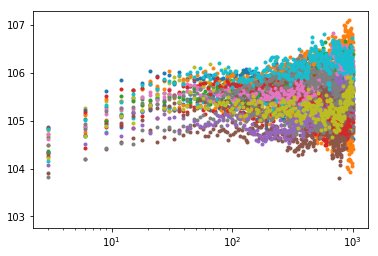

In [108]:
for elem in hilo_corr:
    plt.semilogx(np.arange(0,max_distance,3), elem[::3], '.')
    #plt.show()

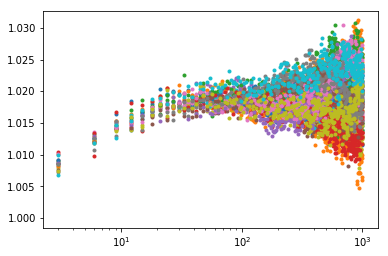

In [109]:
for elem in hilo_corr:
    plt.semilogx(np.arange(0,max_distance,3), elem[::3]/elem[0], '.')
    #plt.show()